In [3]:
#'''The dataset is taken from kaggle. The dataset is structured for both categorical and continuous features. Which includes:

#Column	                          Description
#person_age	                      Age of the person
#person_gender	                  Gender of the person
#person_education	              Highest education level	
#person_income	                  Annual income	
#person_emp_exp	                  Years of employment experience	
#person_home_ownership	          Home ownership status (e.g., rent, own, mortgage)	
#loan_amnt	                      Loan amount requested	
#loan_intent	                      Purpose of the loan	
#loan_int_rate                     Loan interest rate	
#loan_percent_income	              Loan amount as a percentage of annual income	
#cb_person_cred_hist_length	      Length of credit history in years	
#credit_score	                  Credit score of the person	
#previous_loan_defaults_on_file	  Indicator of previous loan defaults	
#loan_status (target variable)     Loan approval status: 1 = approved; 0 = rejected	


#Data Usage:
#The dataset can be used for multiple purposes.

#Classification: Build predictive models to classify the loan_status variable (approved/not approved) for potential applicants.
                                                                    


In [98]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.stats import kurtosis, skew

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from time import time


In [99]:
#Read the data

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data1=pd.read_csv(r"D:\ISI 2025\Class\Project\Ideas\SOme datasets from Kaggle\loan_data - Copy.csv")

data=data1.copy()
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24.0,male,NaN,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6.0,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645.0,No,1
44996,37.0,female,Associate,65800.0,17.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621.0,No,1
44997,33.0,male,Associate,56942.0,7.0,RENT,2771.0,NaN,10.02,0.05,10.0,668.0,No,1
44998,29.0,male,Bachelor,33164.0,4.0,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604.0,No,1


Independent Columns

In [100]:
# Information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44999 non-null  float64
 1   person_gender                   44999 non-null  object 
 2   person_education                44995 non-null  object 
 3   person_income                   44953 non-null  float64
 4   person_emp_exp                  44997 non-null  float64
 5   person_home_ownership           44998 non-null  object 
 6   loan_amnt                       44755 non-null  float64
 7   loan_intent                     44869 non-null  object 
 8   loan_int_rate                   44997 non-null  float64
 9   loan_percent_income             44998 non-null  float64
 10  cb_person_cred_hist_length      44999 non-null  float64
 11  credit_score                    44997 non-null  float64
 12  previous_loan_defaults_on_file  

In [101]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44999.000000,4.495300e+04,44997.000000,44755.000000,44997.000000,44998.000000,44999.000000,44997.000000,45000.000000
mean,27.764261,8.032016e+04,5.410316,9586.101866,11.006564,0.139726,5.867530,632.609107,0.222222
std,6.045149,8.040274e+04,6.063601,6314.114909,2.978876,0.087214,3.879735,50.436597,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720600e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705100e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.579200e+04,8.000000,12250.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [102]:
data.isnull().sum()

person_age                          1
person_gender                       1
person_education                    5
person_income                      47
person_emp_exp                      3
person_home_ownership               2
loan_amnt                         245
loan_intent                       131
loan_int_rate                       3
loan_percent_income                 2
cb_person_cred_hist_length          1
credit_score                        3
previous_loan_defaults_on_file      4
loan_status                         0
dtype: int64

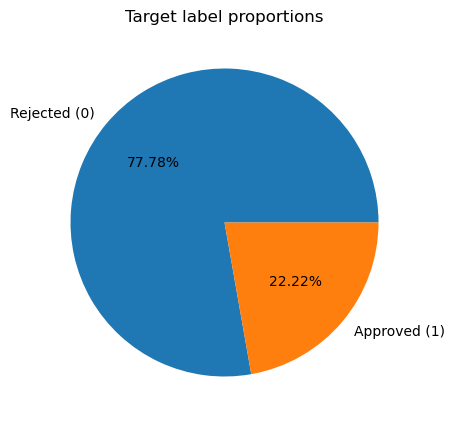

In [103]:
# Approved loan Vs non approved loan

label_prop = data['loan_status'].value_counts()

plt.figure(figsize=(6,5))
plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f%%')

plt.title('Target label proportions')
plt.show()

In [104]:
# Filling Missing Values

data['person_age'].fillna(data['person_age'].median(), inplace=True) 
data['person_income'].fillna(data['person_income'].median(), inplace=True)  
data['person_emp_exp'].fillna(data['person_emp_exp'].median(), inplace=True)
data['loan_amnt'].fillna(data['loan_amnt'].median(), inplace=True)  
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True) 
data['loan_percent_income'].fillna(data['loan_percent_income'].median(), inplace=True)  
data['cb_person_cred_hist_length'].fillna(data['cb_person_cred_hist_length'].median(), inplace=True)  
data['credit_score'].fillna(data['credit_score'].median(), inplace=True)  

data['person_gender'].fillna(data['person_gender'].mode()[0], inplace=True)  
data['person_education'].fillna(data['person_education'].mode()[0], inplace=True)  
data['person_home_ownership'].fillna(data['person_home_ownership'].mode()[0], inplace=True)
data['loan_intent'].fillna(data['loan_intent'].mode()[0],inplace=True)  
data['previous_loan_defaults_on_file'].fillna(data['previous_loan_defaults_on_file'].mode()[0], inplace=True) 


In [105]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [106]:
# convert age to int format
data['person_age'] = data['person_age'].astype('int')
data['person_age'].dtypes

dtype('int32')

In [107]:
# Seperating the categorical and numerical variables

cat_cols = [var for var in data if data[var].dtypes == 'object']
num_cols = [var for var in data if data[var].dtypes != 'object']

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [108]:
# number of male and females

data['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

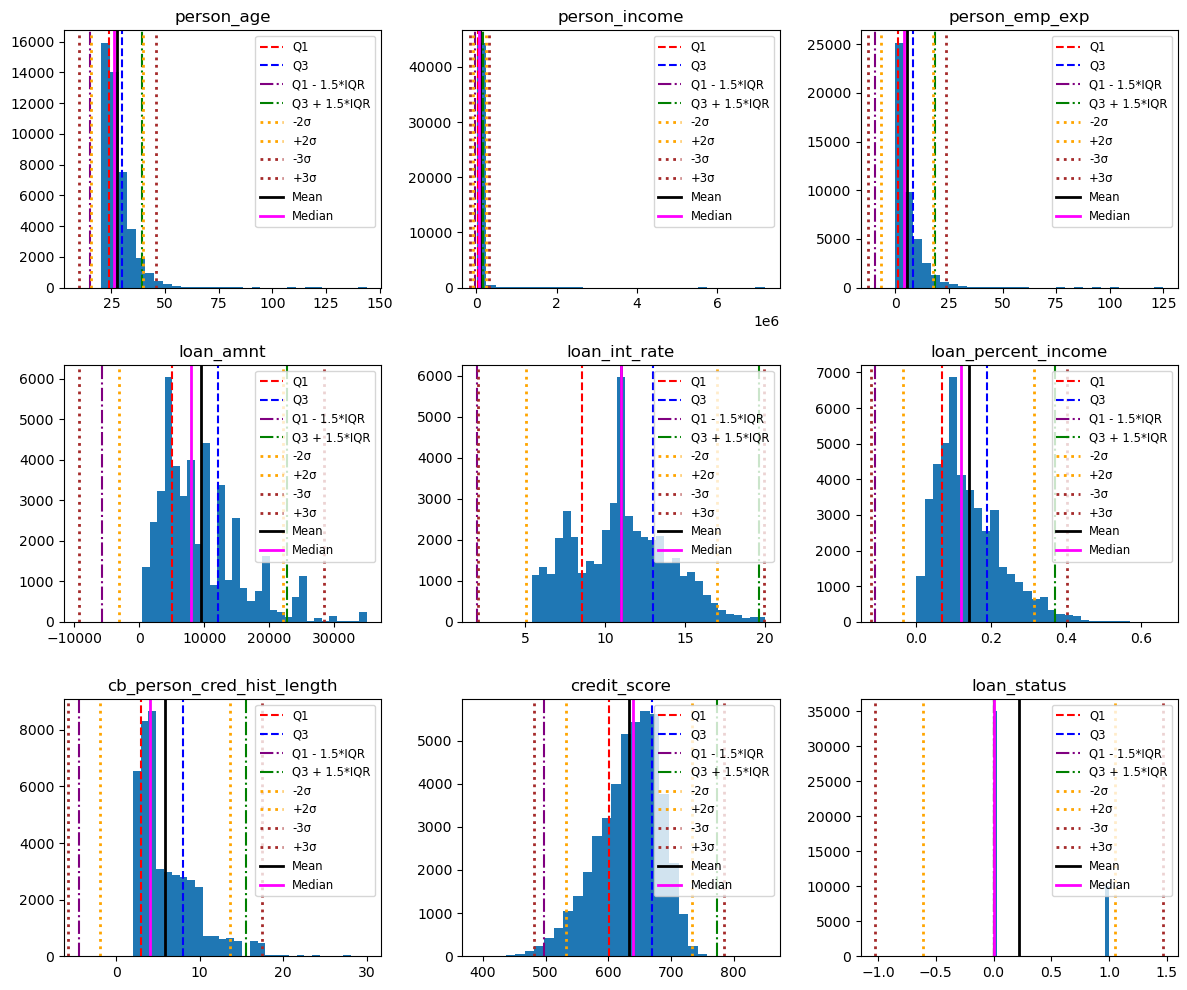

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for all numerical columns in a grid
axes = data[num_cols].hist(bins=30, figsize=(12,10))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.grid(False)  # Disable gridlines

    # Calculate quartiles, median, and IQR for the column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    median = data[col].median()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate mean and standard deviation bounds
    mean = data[col].mean()
    std = data[col].std()
    lower_2std, upper_2std = mean - 2 * std, mean + 2 * std
    lower_3std, upper_3std = mean - 3 * std, mean + 3 * std

    # Draw vertical lines for quartiles and IQR bounds
    ax.axvline(Q1, color='red', linestyle='--', label="Q1")
    ax.axvline(Q3, color='blue', linestyle='--', label="Q3")
    ax.axvline(lower_bound, color='purple', linestyle='-.', label="Q1 - 1.5*IQR")
    ax.axvline(upper_bound, color='green', linestyle='-.', label="Q3 + 1.5*IQR")
    
    # Draw vertical lines for ±2σ and ±3σ boundaries
    ax.axvline(lower_2std, color='orange', linestyle=':', linewidth=2, label="-2σ")
    ax.axvline(upper_2std, color='orange', linestyle=':', linewidth=2, label="+2σ")
    ax.axvline(lower_3std, color='brown', linestyle=':', linewidth=2, label="-3σ")
    ax.axvline(upper_3std, color='brown', linestyle=':', linewidth=2, label="+3σ")
    
    # Draw vertical lines for mean and median
    ax.axvline(mean, color='black', linestyle='-', linewidth=2, label="Mean")
    ax.axvline(median, color='magenta', linestyle='-', linewidth=2, label="Median")
    
    ax.set_title(col)
    ax.legend(fontsize='small', loc='upper right')

plt.tight_layout()
plt.show()


In [110]:
num_cols_without_loan_status=['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

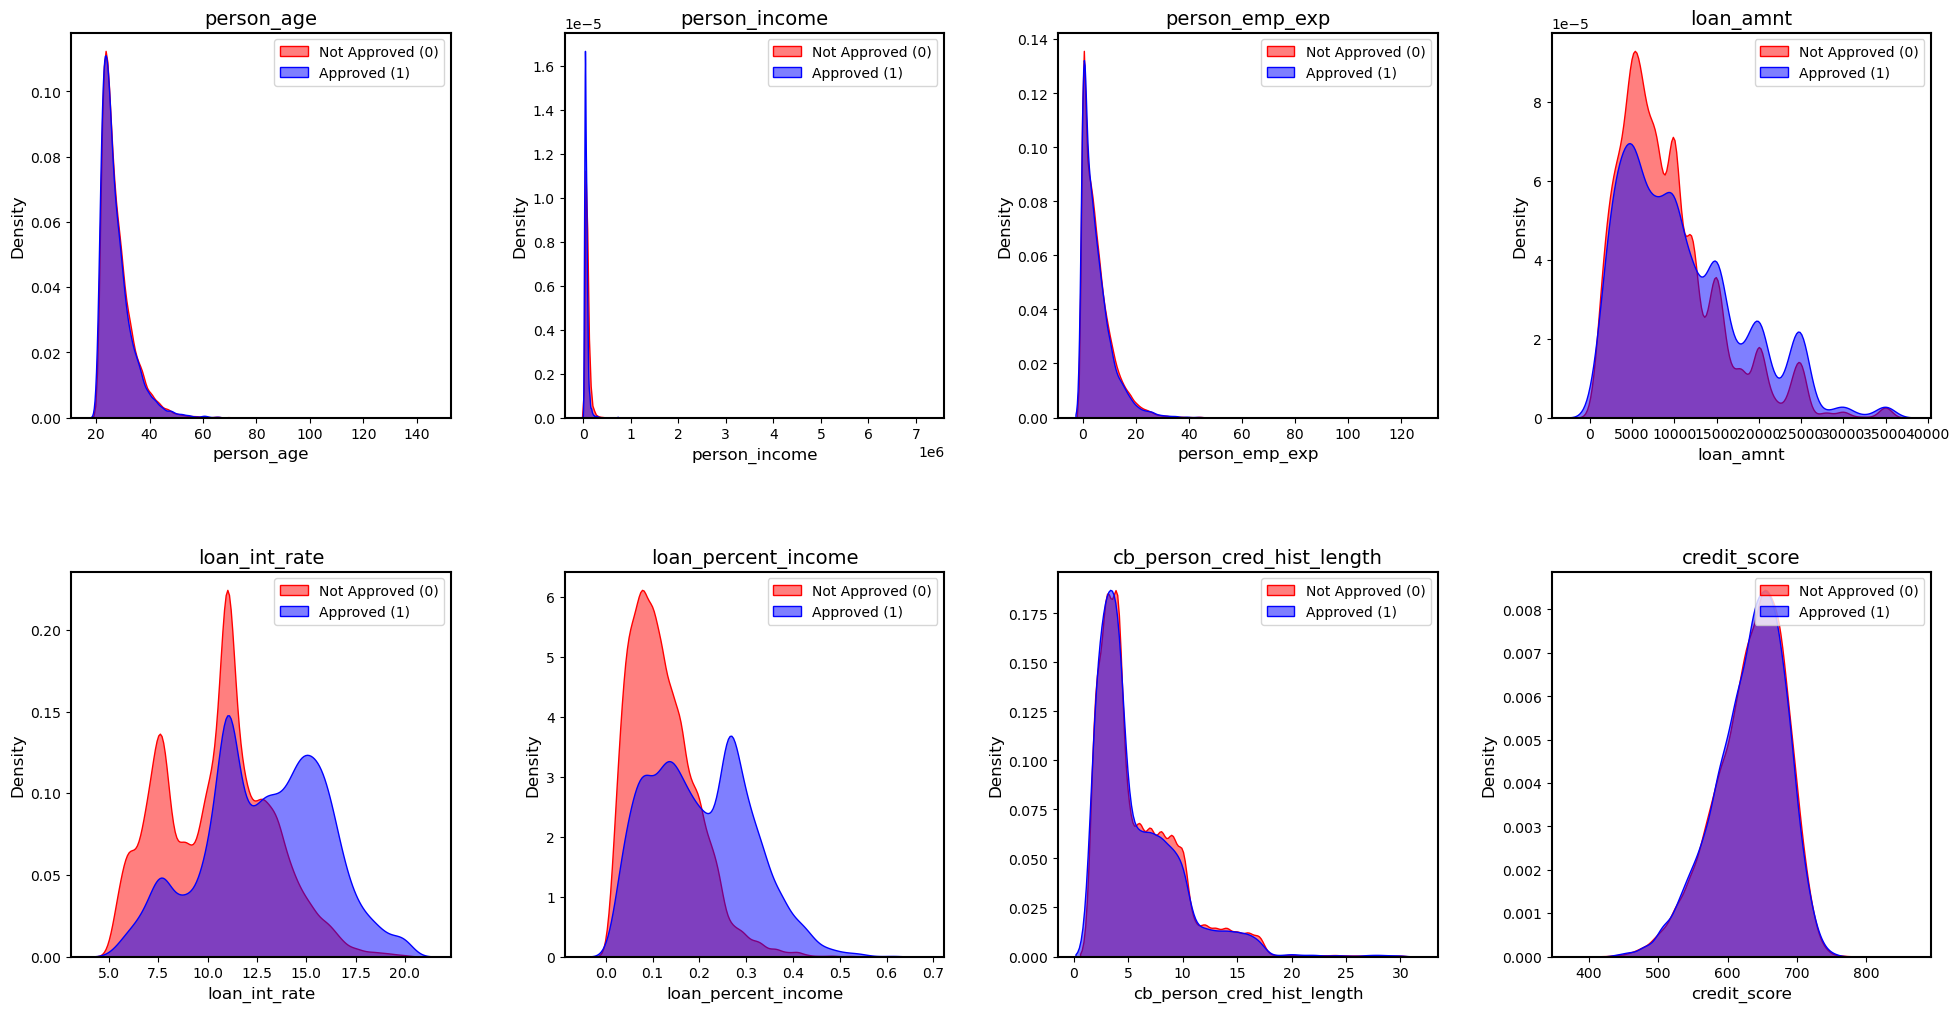

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of rows and columns for subplots
n_rows = 2
n_cols = math.ceil(len(num_cols_without_loan_status) / n_rows)

# Create figure with appropriate size
plt.figure(figsize=(6 * n_cols, 6 * n_rows))

# Loop through numerical columns and plot KDEs
for i, feature in enumerate(num_cols_without_loan_status, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # KDE plots for loan_status 0 and 1
    sns.kdeplot(data[data["loan_status"] == 0][feature], label="Not Approved (0)", fill=True, color="red", alpha=0.5)
    sns.kdeplot(data[data["loan_status"] == 1][feature], label="Approved (1)", fill=True, color="blue", alpha=0.5)
    
    plt.title(feature, fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    
    # Add a border around each subplot
    for _, spine in plt.gca().spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1.5)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

In [112]:
# Histograms for numerical features

#data[num_cols].hist(bins=30, figsize=(12,10))
#plt.show()

In [113]:
print(data.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


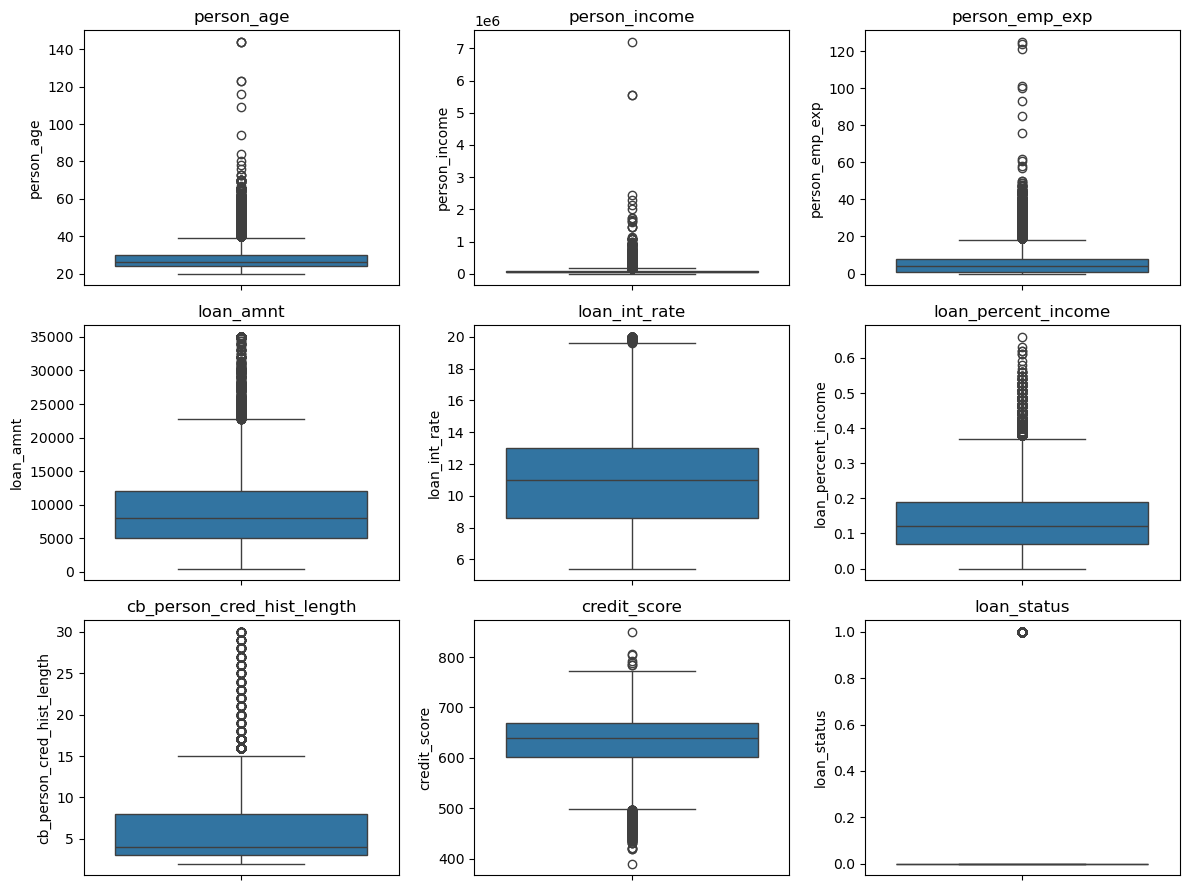

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = 3
rows = math.ceil(len(num_cols) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(y=data[col], ax=ax)
    ax.set_title(col)

# Remove any extra axes
for ax in axes[len(num_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()



In [115]:
from scipy.stats import skew, kurtosis

print('##### Skewness and excess kurtosis after outliers capping #####\n')

for col in num_cols:
    print(f"Skewness of {col}: {skew(data[col])}")
    # Excess kurtosis is returned by default with fisher=True
    print(f"Excess kurtosis of {col}: {kurtosis(data[col], fisher=True)}")
    print()

##### Skewness and excess kurtosis after outliers capping #####

Skewness of person_age: 2.548077521626945
Excess kurtosis of person_age: 18.647456547359603

Skewness of person_income: 34.20374533507615
Excess kurtosis of person_income: 2405.6114403011716

Skewness of person_emp_exp: 2.5950296691507124
Excess kurtosis of person_emp_exp: 19.16799865852734

Skewness of loan_amnt: 1.1854785367689173
Excess kurtosis of loan_amnt: 1.3759810741789904

Skewness of loan_int_rate: 0.21381496172291803
Excess kurtosis of loan_int_rate: -0.42031155327002656

Skewness of loan_percent_income: 1.0344776671250524
Excess kurtosis of loan_percent_income: 1.0821626461535354

Skewness of cb_person_cred_hist_length: 1.6316655626727825
Excess kurtosis of cb_person_cred_hist_length: 3.7253972127643538

Skewness of credit_score: -0.6103269527542234
Excess kurtosis of credit_score: 0.20311198332761515

Skewness of loan_status: 1.3363062095621214
Excess kurtosis of loan_status: -0.2142857142857144



------------------------------

In [116]:
num_cols_without_loan_status=num_cols[:-1]

In [117]:
mms = MinMaxScaler()
ss = StandardScaler()

data[num_cols_without_loan_status] = mms.fit_transform(data[num_cols_without_loan_status])

In [118]:
#Removal of outliers

def remove_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

for col in num_cols_without_loan_status:
    data = remove_outliers_iqr(data, col)

In [119]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,0.008065,female,High School,0.000595,0.000,OWN,0.014493,EDUCATION,0.392318,0.121212,0.000000,0.247826,Yes,0
5,0.008065,female,High School,0.000688,0.000,OWN,0.057971,VENTURE,0.117970,0.287879,0.000000,0.308696,No,1
9,0.008065,female,High School,0.000659,0.000,OWN,0.031884,VENTURE,0.639232,0.196970,0.035714,0.543478,No,1
19,0.032258,female,Master,0.000874,0.008,MORTGAGE,0.036232,EDUCATION,0.382030,0.181818,0.000000,0.543478,No,1
23,0.032258,female,Bachelor,0.000816,0.000,OWN,0.028986,PERSONAL,0.128258,0.166667,0.035714,0.456522,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,0.088710,male,Master,0.017911,0.072,RENT,0.342580,PERSONAL,0.788752,0.136364,0.178571,0.721739,No,1
44993,0.056452,female,High School,0.003825,0.032,RENT,0.130435,PERSONAL,0.713992,0.212121,0.107143,0.250000,No,1
44995,0.056452,male,Associate,0.005557,0.048,RENT,0.420290,MEDICAL,0.702332,0.469697,0.035714,0.554348,No,1
44997,0.104839,male,Associate,0.006804,0.056,RENT,0.065826,EDUCATION,0.315501,0.075758,0.285714,0.604348,No,1


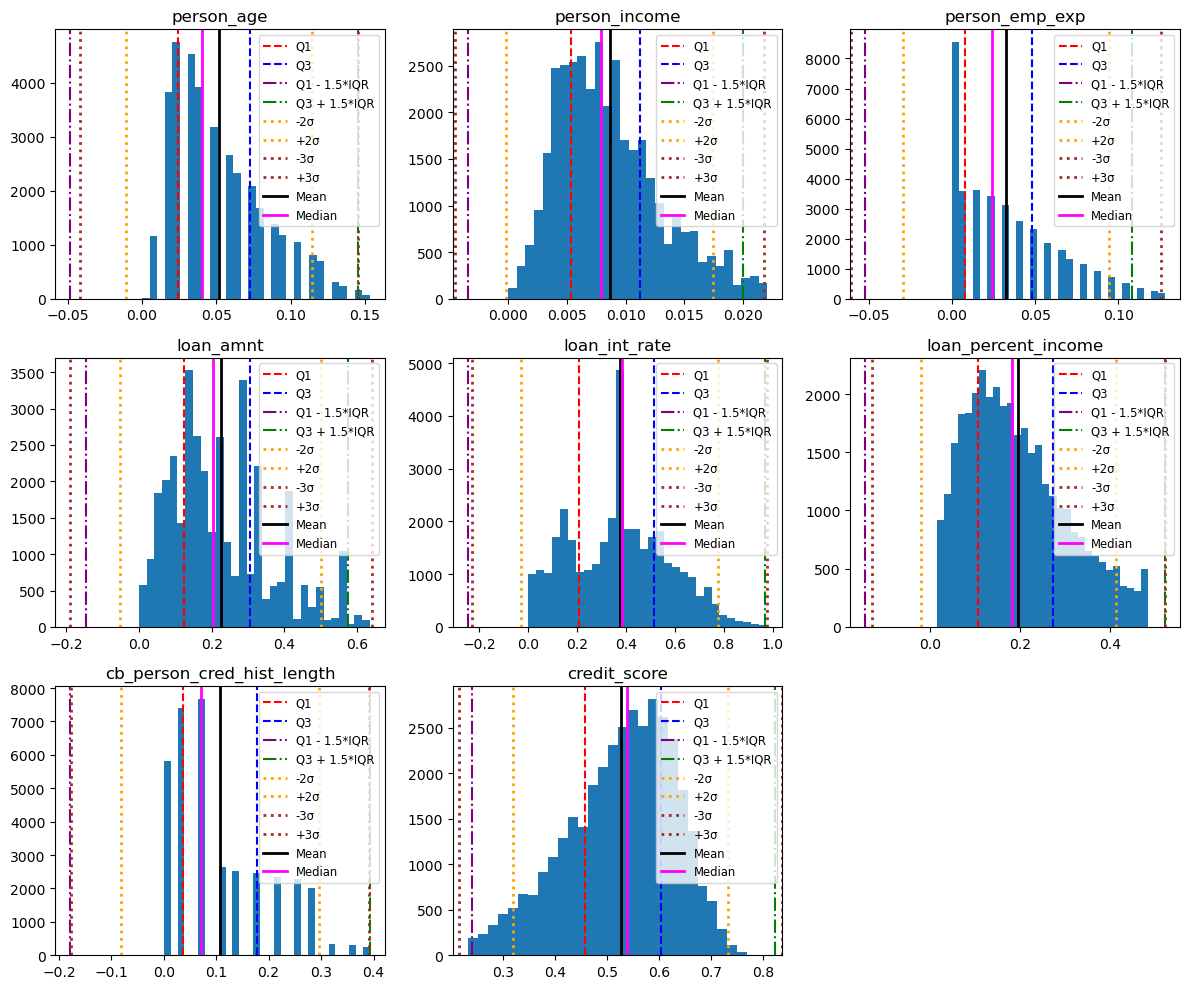

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for all numerical columns (excluding loan status) in a grid
axes = data[num_cols_without_loan_status].hist(bins=30, figsize=(12,10))
axes = axes.flatten()

for ax, col in zip(axes, num_cols_without_loan_status):
    ax.grid(False)  # Disable gridlines for a cleaner look

    # Calculate quartiles, median, and IQR for the column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    median = data[col].median()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate mean and standard deviation bounds
    mean = data[col].mean()
    std = data[col].std()
    lower_2std, upper_2std = mean - 2 * std, mean + 2 * std
    lower_3std, upper_3std = mean - 3 * std, mean + 3 * std

    # Plot vertical lines for quartiles and IQR bounds
    ax.axvline(Q1, color='red', linestyle='--', label="Q1")
    ax.axvline(Q3, color='blue', linestyle='--', label="Q3")
    ax.axvline(lower_bound, color='purple', linestyle='-.', label="Q1 - 1.5*IQR")
    ax.axvline(upper_bound, color='green', linestyle='-.', label="Q3 + 1.5*IQR")
    
    # Plot vertical lines for ±2σ and ±3σ boundaries
    ax.axvline(lower_2std, color='orange', linestyle=':', linewidth=2, label="-2σ")
    ax.axvline(upper_2std, color='orange', linestyle=':', linewidth=2, label="+2σ")
    ax.axvline(lower_3std, color='brown', linestyle=':', linewidth=2, label="-3σ")
    ax.axvline(upper_3std, color='brown', linestyle=':', linewidth=2, label="+3σ")
    
    # Plot vertical lines for mean and median
    ax.axvline(mean, color='black', linestyle='-', linewidth=2, label="Mean")
    ax.axvline(median, color='magenta', linestyle='-', linewidth=2, label="Median")
    
    ax.set_title(col)
    ax.legend(fontsize='small', loc='upper right')

plt.tight_layout()
plt.show()


In [121]:
# Histograms for numerical features after removing outliers

#data[num_cols_without_loan_status].hist(bins=30, figsize=(12,10))
#plt.show()

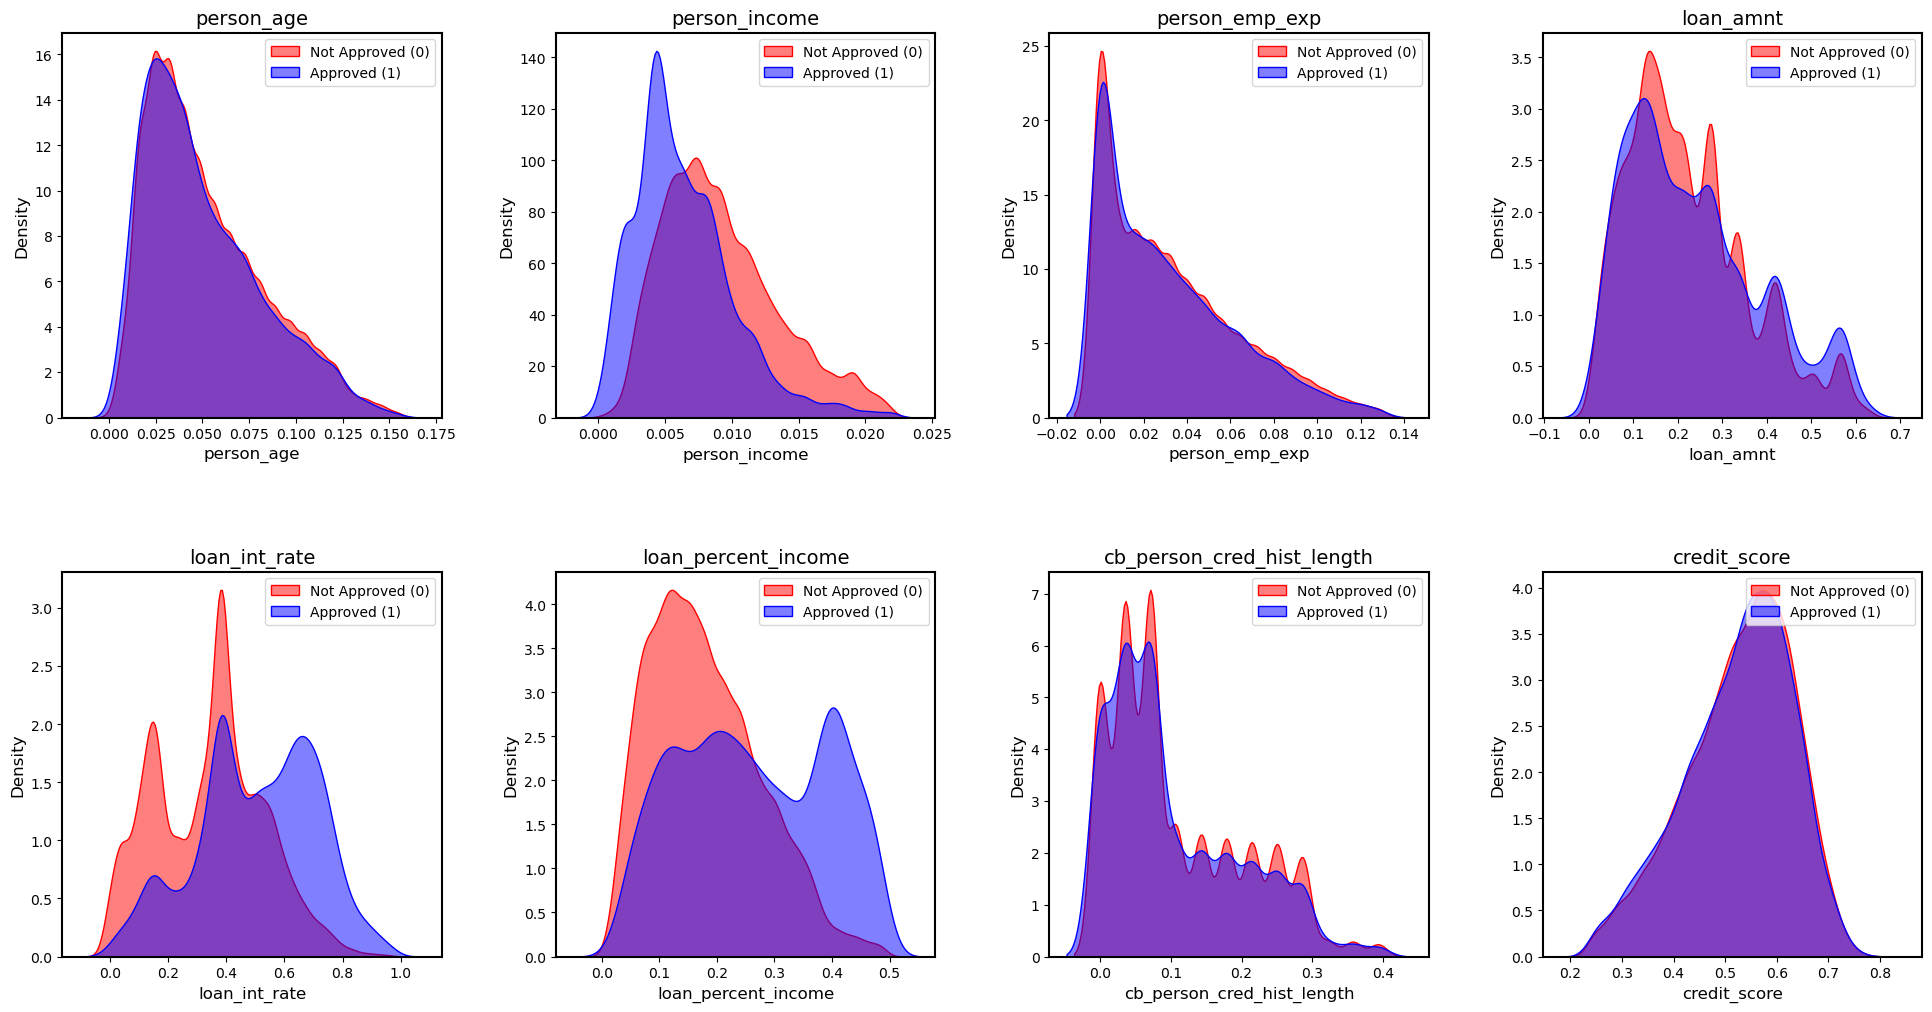

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of rows and columns for subplots
n_rows = 2
n_cols = math.ceil(len(num_cols_without_loan_status) / n_rows)

# Create figure with appropriate size
plt.figure(figsize=(6 * n_cols, 6 * n_rows))

# Loop through numerical columns and plot KDEs
for i, feature in enumerate(num_cols_without_loan_status, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # KDE plots for loan_status 0 and 1
    sns.kdeplot(data[data["loan_status"] == 0][feature], label="Not Approved (0)", fill=True, color="red", alpha=0.5)
    sns.kdeplot(data[data["loan_status"] == 1][feature], label="Approved (1)", fill=True, color="blue", alpha=0.5)
    
    plt.title(feature, fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    
    # Add a border around each subplot
    for _, spine in plt.gca().spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1.5)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


OBS:: We can remove person_age,person_emp_exp,credit score as they are not contributing significantly in loan status prediction

In [123]:
# removing unnessesary columns we get:

data_N=data[['person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_status']]

data_N

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
1,0.000595,0.014493,0.392318,0.121212,0.000000,0
5,0.000688,0.057971,0.117970,0.287879,0.000000,1
9,0.000659,0.031884,0.639232,0.196970,0.035714,1
19,0.000874,0.036232,0.382030,0.181818,0.000000,1
23,0.000816,0.028986,0.128258,0.166667,0.035714,0
...,...,...,...,...,...,...
44990,0.017911,0.342580,0.788752,0.136364,0.178571,1
44993,0.003825,0.130435,0.713992,0.212121,0.107143,1
44995,0.005557,0.420290,0.702332,0.469697,0.035714,1
44997,0.006804,0.065826,0.315501,0.075758,0.285714,1


In [125]:
data_N.columns

Index(['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [126]:
from scipy.stats import skew, kurtosis

print('##### Skewness and excess kurtosis after outliers capping #####\n')

for col in data_N.columns:
    print(f"Skewness of {col}: {skew(data[col])}")
    # Excess kurtosis is returned by default with fisher=True
    print(f"Excess kurtosis of {col}: {kurtosis(data[col], fisher=True)}")
    print()


##### Skewness and excess kurtosis after outliers capping #####

Skewness of person_income: 0.7296633608467685
Excess kurtosis of person_income: 0.09145046213520702

Skewness of loan_amnt: 0.7399064858728985
Excess kurtosis of loan_amnt: -0.07306249837563694

Skewness of loan_int_rate: 0.15658078493703215
Excess kurtosis of loan_int_rate: -0.5744328460538668

Skewness of loan_percent_income: 0.6085208240437843
Excess kurtosis of loan_percent_income: -0.34550122674814654

Skewness of cb_person_cred_hist_length: 0.8475633968307036
Excess kurtosis of cb_person_cred_hist_length: -0.24999610653828785

Skewness of loan_status: 1.4841027037115475
Excess kurtosis of loan_status: 0.2025608351639252



### Categorical Variables

In [138]:
data[cat_cols].dtypes

person_gender                     object
person_education                  object
person_home_ownership             object
loan_intent                       object
previous_loan_defaults_on_file    object
dtype: object

In [139]:
data_C=data[cat_cols]
data_C["loan_status"]=data['loan_status']
data_C

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
1,female,High School,OWN,EDUCATION,Yes,0
5,female,High School,OWN,VENTURE,No,1
9,female,High School,OWN,VENTURE,No,1
19,female,Master,MORTGAGE,EDUCATION,No,1
23,female,Bachelor,OWN,PERSONAL,Yes,0
...,...,...,...,...,...,...
44990,male,Master,RENT,PERSONAL,No,1
44993,female,High School,RENT,PERSONAL,No,1
44995,male,Associate,RENT,MEDICAL,No,1
44997,male,Associate,RENT,EDUCATION,No,1


In [140]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

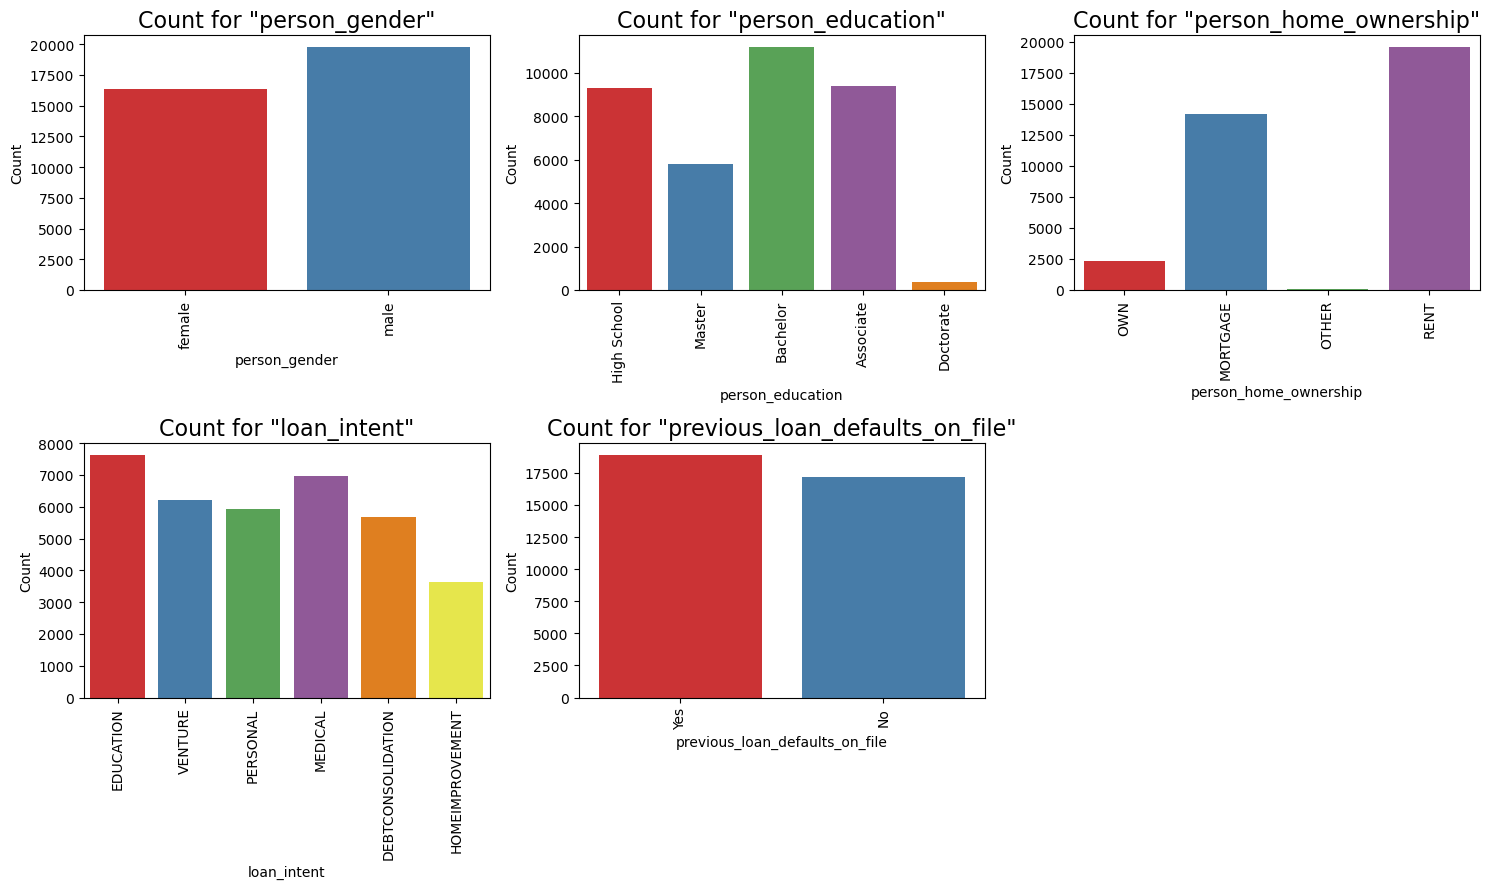

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = 3
rows = math.ceil(len(cat_cols) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4.5))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    sns.countplot(x=data_C[col], palette="Set1", ax=ax)
    ax.set_title(f'Count for "{col}"', fontsize=16)  # Increased title font size
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=90)

# Remove any extra subplots
for ax in axes[len(cat_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

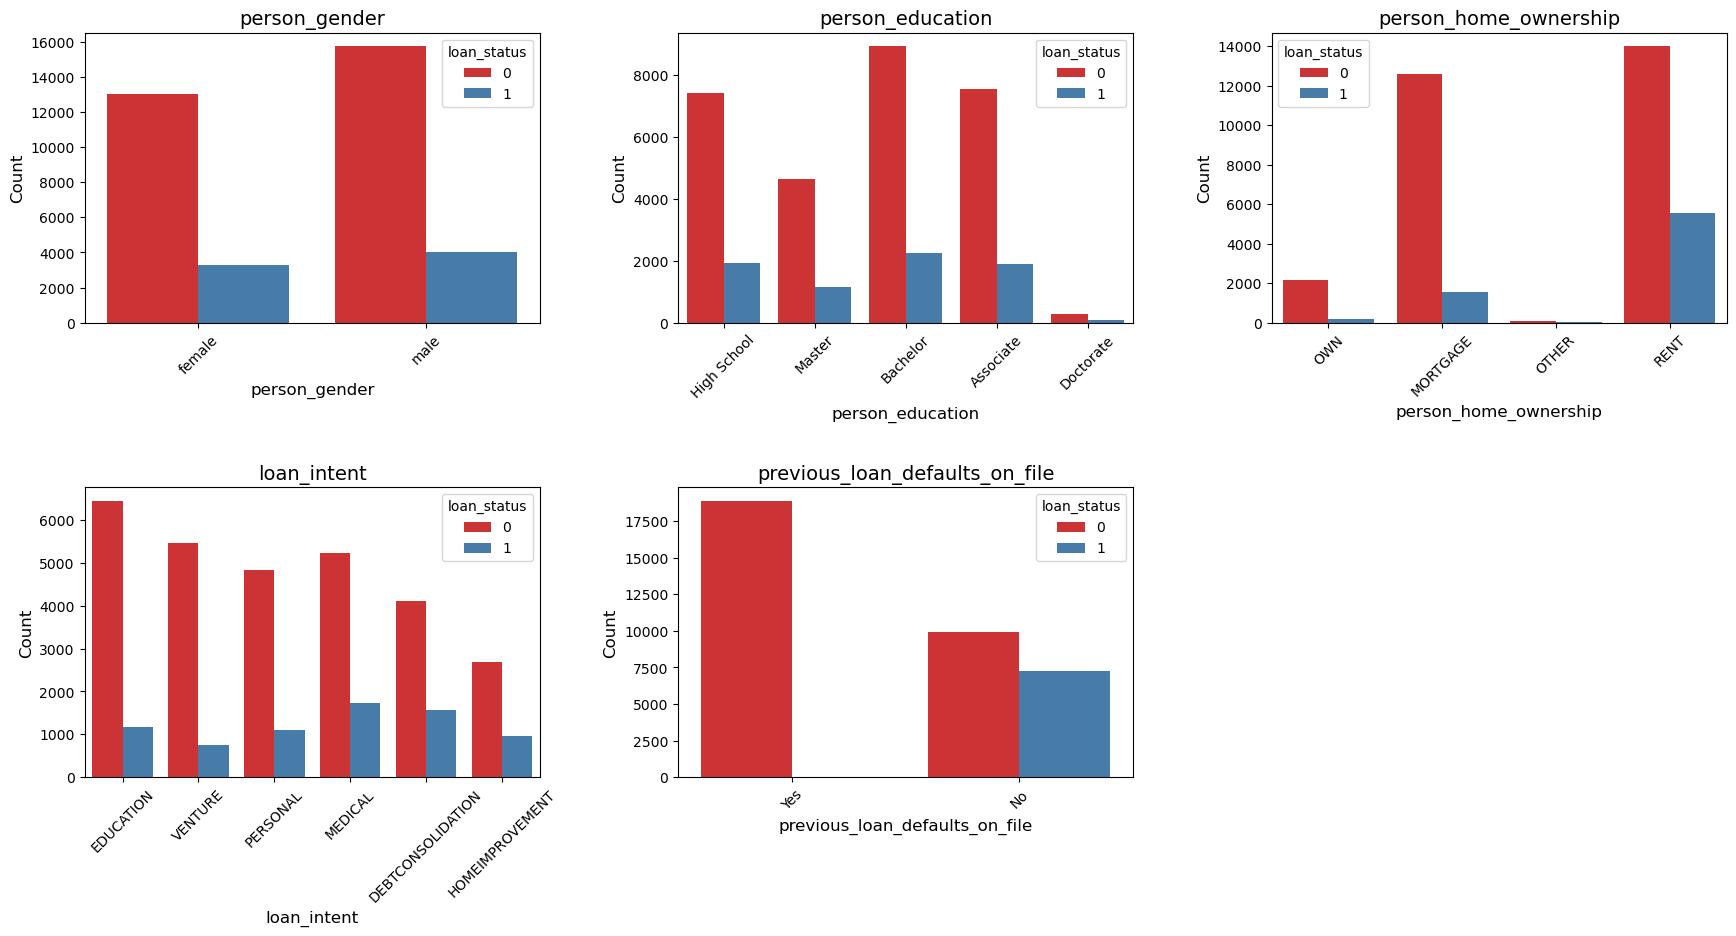

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of rows and columns
n_rows = 2
n_cols = math.ceil(len(cat_cols) / n_rows)

# Increase figure size for larger subplots
plt.figure(figsize=(6 * n_cols, 5 * n_rows))  # Adjust width and height

# Loop over categorical columns and plot
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=data, x=feature, hue="loan_status", palette="Set1")
    plt.title(feature, fontsize=14)  # Larger title
    plt.xlabel(feature, fontsize=12)  # Larger labels
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Increase font size for readability

plt.tight_layout(pad=3)  # Increase padding between subplots
plt.show()


Observation: Each of the categorical features are important

In [144]:
print(data_C['person_gender'].unique())
print(data_C['person_education'].unique())
print(data_C['person_home_ownership'].unique())
print(data_C['loan_intent'].unique())
print(data_C['previous_loan_defaults_on_file'].unique())

['female' 'male']
['High School' 'Master' 'Bachelor' 'Associate' 'Doctorate']
['OWN' 'MORTGAGE' 'OTHER' 'RENT']
['EDUCATION' 'VENTURE' 'PERSONAL' 'MEDICAL' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
['Yes' 'No']


Giving ordering

In [145]:
data_C['person_education'].replace({
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate':4
}, inplace=True)


data_C["person_gender"].replace({'female':1,'male':0},inplace=True)

data_C["previous_loan_defaults_on_file"].replace({'Yes':1,'No':0},inplace=True)

data_C['person_home_ownership'] = data_C['person_home_ownership'].replace('RENT', 1, regex=True)
data_C['person_home_ownership'] = data_C['person_home_ownership'].replace('MORTGAGE', 2, regex=True)
data_C['person_home_ownership'] = data_C['person_home_ownership'].replace('OWN', 3, regex=True)
data_C['person_home_ownership'] = data_C['person_home_ownership'].replace('OTHER', 4, regex=True)

data_C['loan_intent'] = data_C['loan_intent'].replace('PERSONAL', 0, regex=True)
data_C['loan_intent'] = data_C['loan_intent'].replace('EDUCATION', 1, regex=True)
data_C['loan_intent'] = data_C['loan_intent'].replace('MEDICAL', 2, regex=True)
data_C['loan_intent'] = data_C['loan_intent'].replace('VENTURE', 3, regex=True)
data_C['loan_intent'] = data_C['loan_intent'].replace('HOMEIMPROVEMENT', 4, regex=True)
data_C['loan_intent'] = data_C['loan_intent'].replace('DEBTCONSOLIDATION', 5, regex=True)

In [146]:
data_C

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
1,1,0,3,1,1,0
5,1,0,3,3,0,1
9,1,0,3,3,0,1
19,1,3,2,1,0,1
23,1,2,3,0,1,0
...,...,...,...,...,...,...
44990,0,3,1,0,0,1
44993,1,0,1,0,0,1
44995,0,1,1,2,0,1
44997,0,1,1,1,0,1


In [164]:
# Vertically stacking numerical and categorical columns

data_N.drop(columns=['loan_status'], inplace=True)

df_combined = pd.concat([data_N, data_C], axis=1)

df_combined

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
1,0.000595,0.014493,0.392318,0.121212,0.000000,1,0,3,1,1,0
5,0.000688,0.057971,0.117970,0.287879,0.000000,1,0,3,3,0,1
9,0.000659,0.031884,0.639232,0.196970,0.035714,1,0,3,3,0,1
19,0.000874,0.036232,0.382030,0.181818,0.000000,1,3,2,1,0,1
23,0.000816,0.028986,0.128258,0.166667,0.035714,1,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
44990,0.017911,0.342580,0.788752,0.136364,0.178571,0,3,1,0,0,1
44993,0.003825,0.130435,0.713992,0.212121,0.107143,1,0,1,0,0,1
44995,0.005557,0.420290,0.702332,0.469697,0.035714,0,1,1,2,0,1
44997,0.006804,0.065826,0.315501,0.075758,0.285714,0,1,1,1,0,1


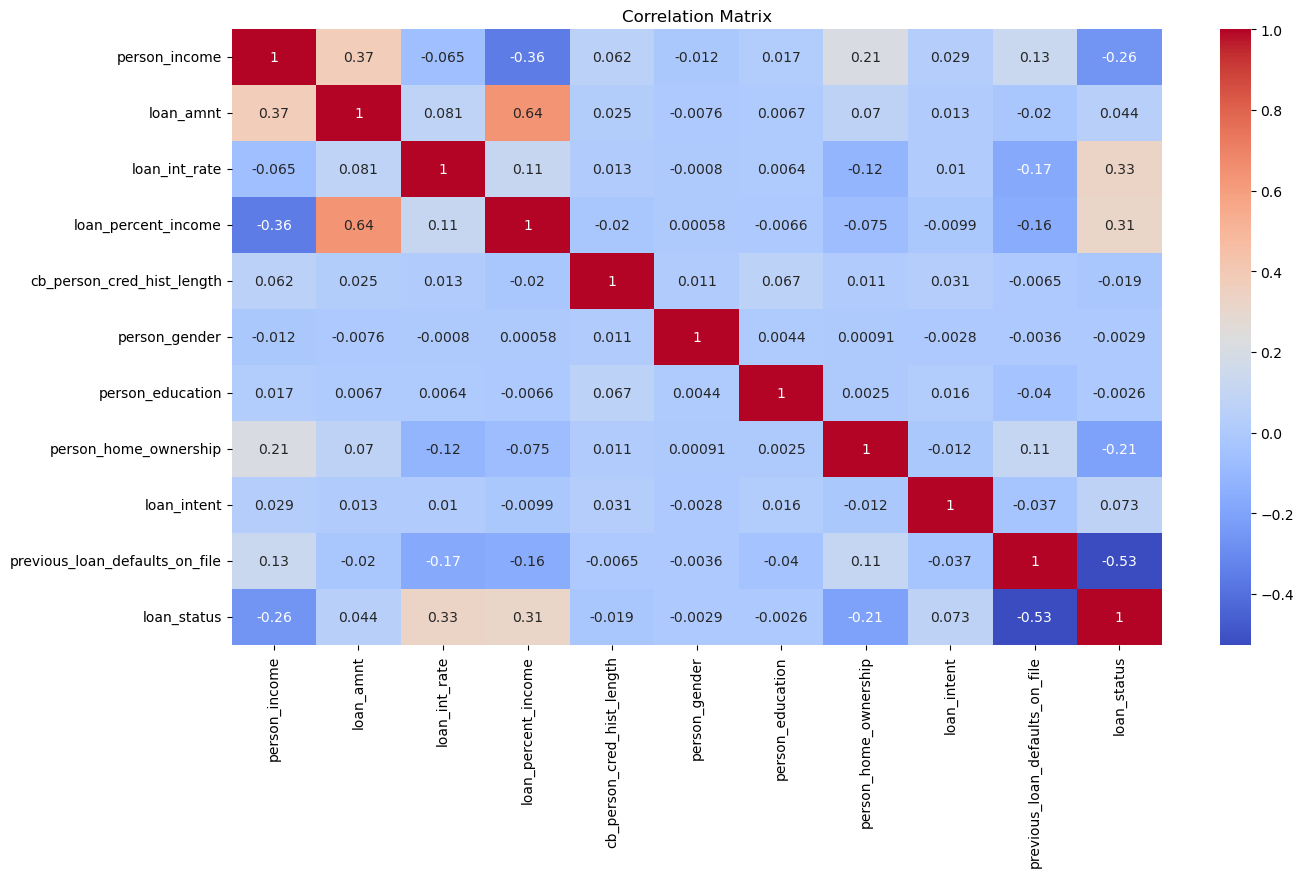

In [165]:
#Correlation Map

plt.figure(figsize=(15, 8))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

-------------------------------------------

# Model Training

In [183]:
X_selected = df_combined.iloc[:,:-1]
Y = df_combined["loan_status"]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28848, 10), (28848,), (7213, 10), (7213,))